# TP6 : Logique Flou

In [46]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

import skfuzzy.control as ctrl

In [47]:
resultats = ctrl.Antecedent(np.arange(0, 21), 'resultats')
methods = ctrl.Antecedent(np.arange(0, 21), 'methods')
presentations = ctrl.Antecedent(np.arange(0, 21), 'presentations')
globals = ctrl.Consequent(np.arange(0, 21), 'globals')

c:\Users\Bandh\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


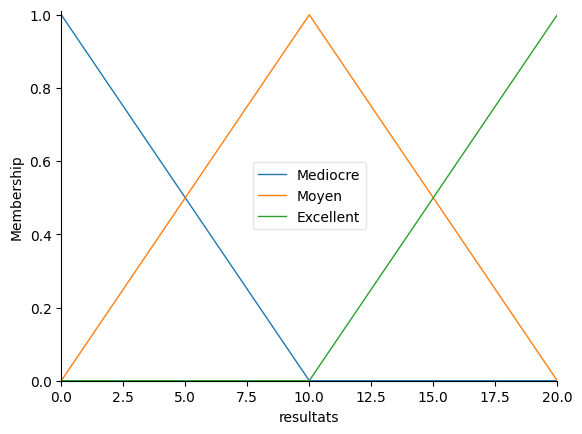

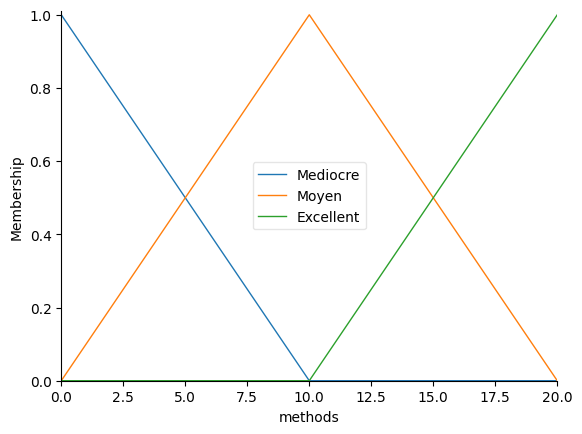

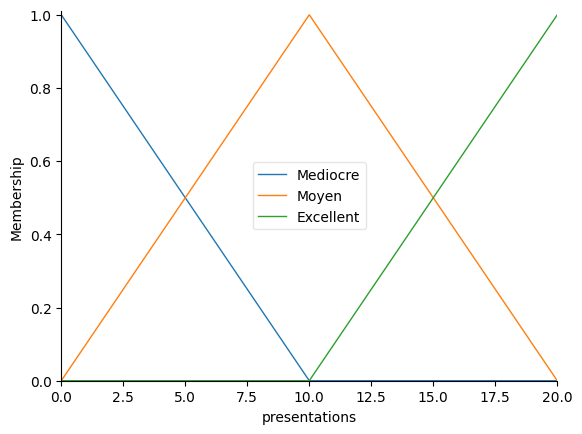

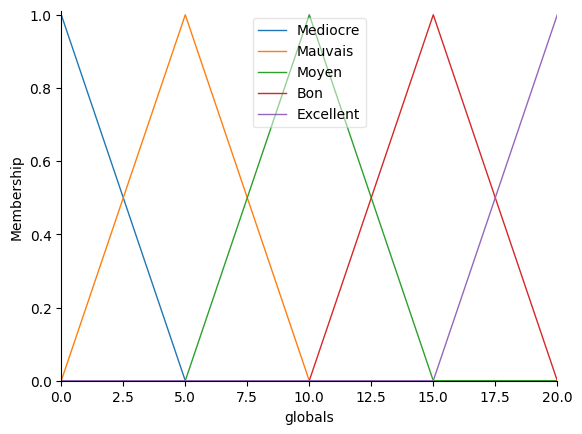

In [48]:
resultats['Mediocre'] = fuzz.trimf(resultats.universe, [0, 0, 10])
resultats['Moyen'] = fuzz.trimf(resultats.universe, [0, 10, 20])
resultats['Excellent'] = fuzz.trimf(resultats.universe, [10, 20, 20])
resultats.view()

methods['Mediocre'] = fuzz.trimf(methods.universe, [0, 0, 10])
methods['Moyen'] = fuzz.trimf(methods.universe, [0, 10, 20])
methods['Excellent'] = fuzz.trimf(methods.universe, [10, 20, 20])
methods.view()

presentations['Mediocre'] = fuzz.trimf(presentations.universe, [0, 0, 10])
presentations['Moyen'] = fuzz.trimf(presentations.universe, [0, 10, 20])
presentations['Excellent'] = fuzz.trimf(presentations.universe, [10, 20, 20])
presentations.view()

globals['Mediocre'] = fuzz.trimf(globals.universe, [0, 0, 5])
globals['Mauvais'] = fuzz.trimf(globals.universe, [0, 5, 10])
globals['Moyen'] = fuzz.trimf(globals.universe, [5, 10, 15])
globals['Bon'] = fuzz.trimf(globals.universe, [10, 15, 20])
globals['Excellent'] = fuzz.trimf(globals.universe, [15, 20, 20])
globals.view()


In [49]:
R1 = ctrl.Rule(resultats['Moyen']       & methods['Mediocre'],                                globals['Mauvais'])
R2 = ctrl.Rule(resultats['Moyen']       & methods['Excellent'],                               globals['Bon'])
R3 = ctrl.Rule(resultats['Mediocre']    & methods['Moyen'],                                   globals['Mauvais'])
R4 = ctrl.Rule(resultats['Excellent']   & methods['Excellent']  & presentations['Excellent'], globals['Excellent'])
R5 = ctrl.Rule(resultats['Mediocre']    | methods['Mediocre'],                                globals['Moyen'])
R6 = ctrl.Rule(resultats['Moyen']       | methods['Mediocre'],                                globals['Mediocre'])
